In [2]:
#MakeMore -  Step by Step Language Modelling (Character Level Prediction)
#Will train using names dataset containing 32K words. 
#treats each words as sequences and do character level prediction

In [3]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [4]:
words = open('names.txt').read().splitlines() #reading text file and split data and store as list

In [5]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [6]:
len(words)

32033

In [7]:
min(len(w) for w in words) #shortest word in training data

2

In [8]:
max(len(w) for w  in words) #longest word in training data

15

In [9]:
#Building Bigram i.e always work with 2 characters at a time...i.e given a character, will predict next character

In [11]:
for w in words[:1]: #lets examine 1st word i.e emma in the list
    for ch1, ch2 in zip(w, w[1:]): #zipping each word with word without 1st letter to get 2 consequtive characters
        print(ch1, ch2)
#if any one the zip has shorter length than others, then it is stopped

e m
m m
m a


In [12]:
#Notice how 2 consecutive characters were extracted 

In [13]:
w

'emma'

In [14]:
w[1:]

'mma'

In [15]:
#when any one of word size dont match, it will stop....

In [16]:
#lets add special char to notice start and end of words

In [23]:
for w in words[:1]: #lets examine 1st word i.e emma in the list
    chs = ['<S>'] + list(w) + ['<E>'] #adding start & end char
    for ch1, ch2 in zip(w, w[1:]): #zipping each word with word without 1st letter to get 2 consequtive characters
        print(ch1, ch2)

e m
m m
m a


In [24]:
list(w)

['e', 'm', 'm', 'a']

In [25]:
#notice list of w, extracted each characters in the word as individual elements

In [26]:
#therefore we will iterate from chs instead of w's
for w in words[:1]: #lets examine 1st word i.e emma in the list
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]): #zipping each word with word without 1st letter to get 2 consequtive characters
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>


In [27]:
list(chs)

['<S>', 'e', 'm', 'm', 'a', '<E>']

In [28]:
for w in words[:2]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]): #zipping each word with word without 1st letter to get 2 consequtive characters
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>


In [29]:
#notice how we identify start and end of each words using special symbols added

In [30]:
#basically to identify which char comes next for given char, we find statistics of finding frequency i.e. counting
#we just count how often bigrams occurs in the training samples

In [31]:
#therefor we create a dictionary to keep counter for each of these bigrams
b = {}
for w in words[:2]: #lets examine 1st word i.e emma in the list
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]): #zipping each word with word without 1st letter to get 2 consequtive characters
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1# check if the bigram exists in dict, if not return 0; if present inc counter by 1
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>


In [33]:
b #notice the bigrams pairs and its frequency count

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 2,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1}

In [34]:
#lets do for all the words
b = {}
for w in words: #lets examine 1st word i.e emma in the list
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]): #zipping each word with word without 1st letter to get 2 consequtive characters
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1# check if the bigram exists in dict, if not return 0; if present inc counter by 1

In [35]:
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [38]:
b.items() #returns the tuples of key values where keys are bigrams & values are counts

dict_items([(('<S>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<E>'), 6640), (('<S>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<S>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<S>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<S>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<S>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<E>'), 3983), (('<S>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<S>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<E>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

In [39]:
sorted(b.items(), key = lambda kv: kv[1]) # sort the dict based on count value

[(('q', 'r'), 1),
 (('d', 'z'), 1),
 (('p', 'j'), 1),
 (('q', 'l'), 1),
 (('p', 'f'), 1),
 (('q', 'e'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('m', 'f'), 1),
 (('p', 'n'), 1),
 (('w', 'b'), 1),
 (('p', 'c'), 1),
 (('h', 'p'), 1),
 (('f', 'h'), 1),
 (('b', 'j'), 1),
 (('f', 'g'), 1),
 (('z', 'g'), 1),
 (('c', 'p'), 1),
 (('p', 'k'), 1),
 (('p', 'm'), 1),
 (('x', 'n'), 1),
 (('s', 'q'), 1),
 (('k', 'f'), 1),
 (('m', 'k'), 1),
 (('x', 'h'), 1),
 (('g', 'f'), 1),
 (('v', 'b'), 1),
 (('j', 'p'), 1),
 (('g', 'z'), 1),
 (('v', 'd'), 1),
 (('d', 'b'), 1),
 (('v', 'h'), 1),
 (('h', 'h'), 1),
 (('g', 'v'), 1),
 (('d', 'q'), 1),
 (('x', 'b'), 1),
 (('w', 'z'), 1),
 (('h', 'q'), 1),
 (('j', 'b'), 1),
 (('x', 'm'), 1),
 (('w', 'g'), 1),
 (('t', 'b'), 1),
 (('z', 'x'), 1),
 (('p', 'b'), 2),
 (('t', 'g'), 2),
 (('q', 's'), 2),
 (('t', 'x'), 2),
 (('f', 'k'), 2),
 (('b', 't'), 2),
 (('j', 'n'), 2),
 (('k', 'c'), 2),
 (('z', 'k'), 2),
 (('s', 'j'), 2),
 (('s', 'f'), 2),
 (('z', 'j'), 2),
 (('n', 'q

In [41]:
sorted(b.items(), key = lambda kv: -kv[1]) # sort the dict based on count value; descending order
#sorts based on most likely bigrams i.e. more frequest

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [42]:
#now we need to keep above info into significantly convinient format insted of dictionary
#store the info into 2D format
#1st char in row & 2nd char in column
#each entry in thhis matrix will tell how freq 2nd follow 1st char based on its intersection

In [43]:
import torch

In [44]:
a = torch.zeros(3, 5)

In [45]:
a

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [47]:
a.dtype #by default single precision floating point numbers

torch.float32

In [48]:
a = torch.zeros((3, 5), dtype=torch.int32) #as count is integer values

In [49]:
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [50]:
a[1,3] = 1 #indexing the tensors

In [51]:
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [52]:
#26 chars, 2 special chars...therefor 28 * 28 array

In [53]:
N = torch.zeros((28, 28), dtype=torch.int32)

In [ ]:
#creating lookup table first for each characters

In [54]:
char = sorted(list(set(''.join(words)))) #get all distinct char for lookup
stoi ={s:i for i,s in enumerate(char)} #string to index
stoi #notice we index characters using index

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [55]:
stoi['<S>'] = 26 #adding special chars
stoi['<E>'] = 27

In [56]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] #get the index of character1
        ix2 = stoi[ch2] #get the index of character2
        N[ix1, ix2] += 1

In [57]:
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

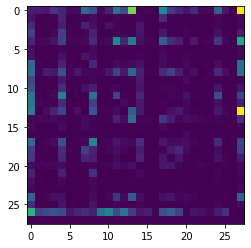

In [59]:
plt.imshow(N)

In [61]:
#to make above chart much more interactive....

In [62]:
#N

In [64]:
itos ={i:s for s,i in stoi.items()} #index to string

In [65]:
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

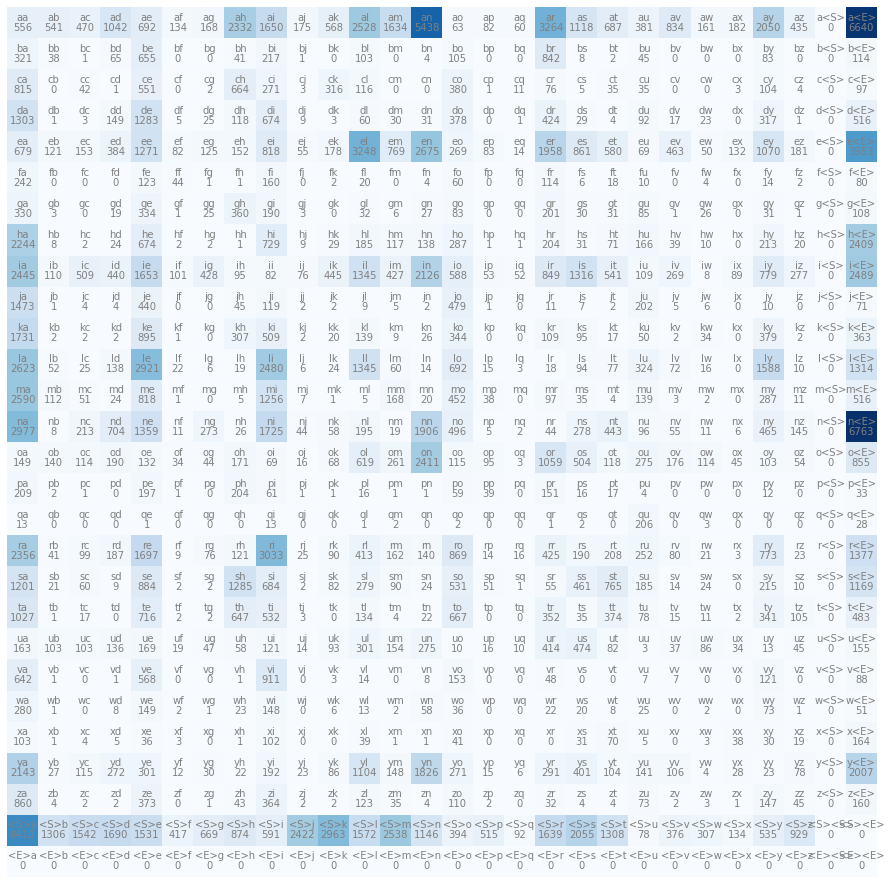

In [66]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [67]:
#noticing the graph, we identified <E> will not be a start letter for any words...hence we can optimize it

In [69]:
N = torch.zeros((27, 27), dtype=torch.int32) #hence we are not going to use 2 special token, instead only one
#instead of <s> & <E> to '.'

In [70]:
char = sorted(list(set(''.join(words)))) #get all distinct char for lookup
stoi ={s:i+1 for i,s in enumerate(char)}
stoi['.'] = 0 #.represents special char
itos ={i:s for s,i in stoi.items()}

In [71]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [72]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [73]:
#Re-Computing the matrix again...

In [74]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] #get the index of character1
        ix2 = stoi[ch2] #get the index of character2
        N[ix1, ix2] += 1

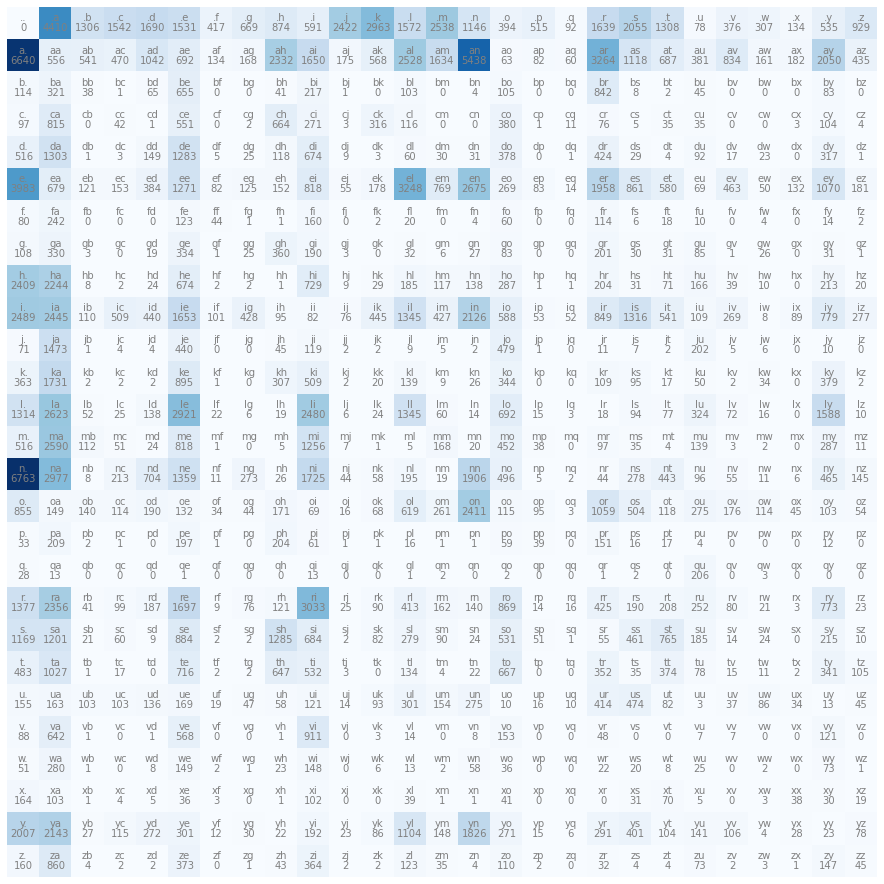

In [75]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [79]:
#above chart shows the count array of given dataset
#This array has all the information to actually sample from this bigram - character level language model

In [80]:
#N[0, :]#0th row & all column values i.e. 1D Array
#or
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [81]:
N[0, :].shape

torch.Size([27])

In [83]:
#we need to convert these values into probabilities
p = N[0].float() #reason for float to normalize the counts
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [84]:
p.sum() #will be summing up to 1 since we normalized the data and converted into proba

tensor(1.)

In [85]:
#to sample these data, we use multinomial prob distribution

In [86]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()

In [88]:
p #nice prob dist of 3 no's
#now we can pass this to multinomial dist to draw samples

tensor([0.6064, 0.3033, 0.0903])

In [89]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)
#60% will be 0 , 30% will be 1 & 10% will be 2...since probabilities of p is 60, 30 & 10%!!!

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [97]:
#lets do for our bag of words
#we need to convert these values into probabilities
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [98]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix

10

In [99]:
itos[ix]

'j'

In [100]:
#next we go to jth row and sample again... 
#loop starts when we meet '.'

In [101]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break;
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [102]:
#We have generated 10 different sequence of words based on bigram probabilities
#Seems these names look terrible, because of Bigram language model performance
#can we fine tune  ?

In [103]:
p.shape

torch.Size([27])

In [104]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        #p = N[ix].float()
        #p = p / p.sum()
        p = torch.ones(27) / 27.0 #kind of uniform distribution making everything equally likely
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break;
    print(''.join(out))

juwjdvdipkcqaz.
p.
cfqywocnzqfjiirltozcogsjgwzvudlhnpauyjbilevhajkdbduinrwibtlzsnjyievyvaftbzffvmumthyfodtumjrpfytszwjhrjagq.
coreaysezocfkyjjabdywejfmoifmwyfinwagaasnhsvfihofszxhddgosfmptpagicz.
rjpiufmthdt.
rkrrsru.
iyumuyfy.
mjekujcbkhvupwyhvpvhvccragr.
wdkhwfdztta.
mplyisbxlyhuuiqzavmpocbzthqmimvyqwat.


In [105]:
#This is something model without training...
#but bigram was something better...

In [106]:
#currently we sample one row from N and finding its probability
#instead we want to create matrix that contains all probabilities

In [113]:
P = N.float()

In [115]:
P.sum() #produces sum of all word count probabilities, instead we need to calculate at row level

tensor(228146.)

In [ ]:
#Refer toch.sum documentation

In [117]:
P.sum(0, keepdim=True) #aggregating columns at row level

tensor([[32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
         17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
         12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.]])

In [118]:
P.sum(0, keepdim=True).shape

torch.Size([1, 27])

In [116]:
P.sum(1, keepdim=True) #aggregating columns at row level

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

In [119]:
#P = P / (P.sum(1, keepdim=True)) #broadcasting is done here.. P is matrix, below sum is single column
P /= (P.sum(1, keepdim=True)) #much faster because of inmemory and not creating new variable

In [126]:
# 27 27 --> P dimension
# 27 1 --> P.sum dimension
#thought both have different dimension, but broadcasting rules are met
#Read Broadcasting Semantics documentation in pytorch

In [127]:
P[0].sum()

tensor(1.)

In [128]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break;
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [125]:
#getting exactly same results

In [130]:
#till now, we trained a bi-gram model using count frequency and we learned to sample from the model
#We just iteratively sample the next character and feed it in each time and get a next character

In [131]:
#How quality was the above model results ?
#How to get the loss function

In [132]:
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] #get the index of character1
        ix2 = stoi[ch2] #get the index of character2
        prob = P[ix2, ix2]
        print(f"{ch1}{ch2}: {prob:.4f}")

.e: 0.0622
em: 0.0253
mm: 0.0253
ma: 0.0164
a.: 0.0000
.o: 0.0145
ol: 0.0964
li: 0.0046
iv: 0.0027
vi: 0.0046
ia: 0.0164
a.: 0.0000
.a: 0.0164
av: 0.0027
va: 0.0164
a.: 0.0000


In [133]:
#Total 27 chars ; equaly prob = 1/27 ~ 4%
1/27

0.037037037037037035

In [134]:
#notice many bigram with above 4% which means we learned something useful from that bigram...
#if a good model, these prob should be near equal to 1
#how can we summarize these prob into a single number to arrive at loss value or that measures quality of this model?
#Maximum Likelihood Estimate function
#Product of all these probabilities and should be as high as possible
#but usually this is very very small no
#hence we go for Log Likelihood !!!

In [135]:
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] #get the index of character1
        ix2 = stoi[ch2] #get the index of character2
        prob = P[ix2, ix2]
        logprob = torch.log(prob)
        print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")

.e: 0.0622 -2.7769
em: 0.0253 -3.6772
mm: 0.0253 -3.6772
ma: 0.0164 -4.1100
a.: 0.0000 -inf
.o: 0.0145 -4.2340
ol: 0.0964 -2.3397
li: 0.0046 -5.3747
iv: 0.0027 -5.9069
vi: 0.0046 -5.3747
ia: 0.0164 -4.1100
a.: 0.0000 -inf
.a: 0.0164 -4.1100
av: 0.0027 -5.9069
va: 0.0164 -4.1100
a.: 0.0000 -inf


In [136]:
#log(a*b) = log(a) + log(b)
#log will add instead of product. Hence summing of probabilities will be good no

In [137]:
log_likelihood = 0.0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] #get the index of character1
        ix2 = stoi[ch2] #get the index of character2
        prob = P[ix2, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")
print(log_likelihood)

.e: 0.0622 -2.7769
em: 0.0253 -3.6772
mm: 0.0253 -3.6772
ma: 0.0164 -4.1100
a.: 0.0000 -inf
.o: 0.0145 -4.2340
ol: 0.0964 -2.3397
li: 0.0046 -5.3747
iv: 0.0027 -5.9069
vi: 0.0046 -5.3747
ia: 0.0164 -4.1100
a.: 0.0000 -inf
.a: 0.0164 -4.1100
av: 0.0027 -5.9069
va: 0.0164 -4.1100
a.: 0.0000 -inf
tensor(-inf)


In [138]:
#when all probabilities  = 1; Log(1) = 0
#when all prob are lower , log value will be more and more lower
#But definition of loss function says low is good...
#with loglikelihood, it is reverse
#hence we go for negative log likelihood

In [147]:
log_likelihood = 0.0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] #get the index of character1
        ix2 = stoi[ch2] #get the index of character2
        prob = P[ix2, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        #print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")

print(f'Log Likelihood = {log_likelihood}')
nll = -log_likelihood
print(f'Negative Log Likelihood = {nll}')

Log Likelihood = -inf
Negative Log Likelihood = inf


In [148]:
#normalize the loss function
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] #get the index of character1
        ix2 = stoi[ch2] #get the index of character2
        prob = P[ix2, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")

print(f'Log Likelihood = {log_likelihood}')
nll = -log_likelihood
print(f'Negative Log Likelihood = {nll}')
print(f'Avg neg log likelihood = {nll/n}')

Log Likelihood = -inf
Negative Log Likelihood = inf
Avg neg log likelihood = inf


In [149]:
#Goal is to maximize likelihood of the data w.r.t model parameters (Statistical modelling)
#equivalent to maximise the log likelihood function (because log is monotonic)
#equivalent to minimizing the negative log likelihood function
#equivalent to minimizing the average negaive log likelihood function

In [150]:
#normalize the loss function
log_likelihood = 0.0
n = 0
for w in ["andre"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] #get the index of character1
        ix2 = stoi[ch2] #get the index of character2
        prob = P[ix2, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")

print(f'Log Likelihood = {log_likelihood}')
nll = -log_likelihood
print(f'Negative Log Likelihood = {nll}')
print(f'Avg neg log likelihood = {nll/n}')

.a: 0.0164 -4.1100
an: 0.1040 -2.2634
nd: 0.0271 -3.6078
dr: 0.0335 -3.3973
re: 0.0622 -2.7769
e.: 0.0000 -inf
Log Likelihood = -inf
Negative Log Likelihood = inf
Avg neg log likelihood = inf


In [151]:
#normalize the loss function
log_likelihood = 0.0
n = 0
for w in ["balaji"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] #get the index of character1
        ix2 = stoi[ch2] #get the index of character2
        prob = P[ix2, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")

print(f'Log Likelihood = {log_likelihood}')
nll = -log_likelihood
print(f'Negative Log Likelihood = {nll}')
print(f'Avg neg log likelihood = {nll/n}')

.b: 0.0144 -4.2428
ba: 0.0164 -4.1100
al: 0.0964 -2.3397
la: 0.0164 -4.1100
aj: 0.0007 -7.2793
ji: 0.0046 -5.3747
i.: 0.0000 -inf
Log Likelihood = -inf
Negative Log Likelihood = inf
Avg neg log likelihood = inf


In [152]:
#log likelihood is going to infinity ???
#because j. combination is not available in bigram model..hence prob goes to infinity
#to avoid this, need to smooth out the model
#we add 1 to values instead of 0

In [153]:
P = (N+1).float() #this will ensure no prob with 0

In [154]:
P /= P.sum(1, keepdims=True)

In [155]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break;
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [157]:
#normalize the loss function
log_likelihood = 0.0
n = 0
for w in ["balajij"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] #get the index of character1
        ix2 = stoi[ch2] #get the index of character2
        prob = P[ix2, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")

print(f'Log Likelihood = {log_likelihood}')
nll = -log_likelihood
print(f'Negative Log Likelihood = {nll}')
print(f'Avg neg log likelihood = {nll/n}')

.b: 0.0146 -4.2270
ba: 0.0164 -4.1090
al: 0.0962 -2.3408
la: 0.0164 -4.1090
aj: 0.0010 -6.8831
ji: 0.0047 -5.3641
ij: 0.0010 -6.8831
j.: 0.0000 -10.3754
Log Likelihood = -44.29145050048828
Negative Log Likelihood = 44.29145050048828
Avg neg log likelihood = 5.536431312561035


In [158]:
#So now, our model will predict some loss values instead of infinity

In [159]:
#Till now, we trained a respectable Bigram Model
#we created list of bigrams, its co-occurance count
#converted into probabilities & normalized
#and sample character to generate new words
#and found loss function to measure performance of model

In [160]:
#Lets implement the same using pytorch
#we will cast bigram problem into neural net framework

In [161]:
import torch

In [162]:
#create the training set of all the bigrams (x, y)

In [163]:
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)# instead we add input into xs
        ys.append(ix2)# equivalent next char output into ys

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [167]:
#Note: torch.Tensor (returns torch.FloatTensor) vs torch.tensor (infers dtype automatically based on data)

In [164]:
xs

tensor([ 0,  5, 13, 13,  1])

In [165]:
ys

tensor([ 5, 13, 13,  1,  0])

In [168]:
#We need to think through how we are going to feed these inputs into Neural net
#not quite straight forward, because these inputs are integer index. So, we cant just plug an integer index into NN
#Because, NN are made of neurons, which has weights that gets multiplied with the inputs
#doesnt make sense to fed in inputs and then multiply on with weights
#instead we need to encode these inputs
#1 - HOT ENCODING. Keep 1 for respective postion & others as 0

In [169]:
#will create 1 - hot encoding

In [170]:
import torch.nn.functional as F

In [171]:
xenc = F.one_hot(xs, 27) # input, no of classes

In [172]:
xenc.shape

torch.Size([5, 27])

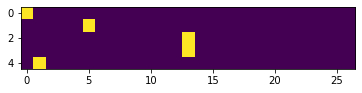

In [173]:
plt.imshow(xenc)

In [174]:
xenc #notice how encoding is done

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [178]:
xenc.dtype #when plug into neural net, we dont want to be integer and want to be a floating point numbers

torch.float32

In [179]:
xenc = xenc.float()

In [180]:
xenc.dtype#since tensor operate using float

torch.float32

In [181]:
#input layer has 27 neurons, representing each charters & need to assign weights for these inputs for computations

In [182]:
W = torch.randn((27, 1))
W

tensor([[ 0.0843],
        [-0.1979],
        [ 0.2421],
        [ 1.0459],
        [-1.0514],
        [ 1.0304],
        [ 1.6325],
        [ 0.8171],
        [ 0.6526],
        [-0.3671],
        [-0.1824],
        [-1.4216],
        [ 1.3417],
        [-1.9057],
        [ 1.2060],
        [-1.0728],
        [ 0.1300],
        [-0.8715],
        [ 1.1024],
        [-1.8215],
        [ 1.5208],
        [ 1.4340],
        [-0.7782],
        [-0.9834],
        [ 0.6056],
        [-1.1756],
        [ 0.5133]])

In [119]:
xenc @ W #@ refers matrix multiplication

tensor([[ 1.6009],
        [-0.4097],
        [-1.2323],
        [-1.2323],
        [ 0.4836]])

In [183]:
# (5, 27) @ (27, 1) = (5, 1) #broadcasing logic matches
#because 27 will multiply & add

In [184]:
#we need hidden layer with 27 neurons, hence...

In [185]:
W = torch.randn((27, 27))
W

tensor([[ 2.5226e-01, -6.7112e-01,  6.0510e-01,  5.8823e-02,  3.0044e-02,
         -5.3588e-02,  5.1079e-01, -1.1229e+00,  1.3122e+00,  1.2786e+00,
          2.6575e-01, -1.1990e+00,  6.2112e-01,  2.1425e-01,  5.1588e-01,
          1.7795e+00, -3.2452e-01,  1.6070e-02, -1.0526e-01, -4.8737e-01,
          1.1465e-01,  1.0204e+00,  8.0268e-01,  9.6375e-02,  7.5437e-01,
          8.3067e-01,  1.1552e+00],
        [ 8.1342e-02, -1.9458e+00,  3.3302e-01,  2.2154e-01, -1.7861e-01,
          1.7052e-01, -1.1911e+00,  1.5537e+00, -5.0155e-01,  7.4743e-01,
          1.2940e-01, -5.8532e-01,  1.5605e+00, -6.2564e-04, -1.5489e+00,
          5.8185e-02, -1.0298e-01,  1.7195e+00,  8.0733e-01, -5.9383e-01,
         -1.4894e+00,  1.1392e+00,  8.5560e-01,  3.0435e-02, -1.4194e+00,
         -1.0821e-01,  6.2161e-02],
        [-1.2825e+00, -8.1807e-01, -9.4540e-01,  5.9162e-01,  5.9119e-02,
         -7.8515e-01, -1.1474e+00,  2.3466e+00, -1.1265e+00,  2.0912e-01,
         -1.0367e+00,  4.0875e-01, -3.15

In [186]:
xenc @ W

tensor([[ 2.5226e-01, -6.7112e-01,  6.0510e-01,  5.8823e-02,  3.0044e-02,
         -5.3588e-02,  5.1079e-01, -1.1229e+00,  1.3122e+00,  1.2786e+00,
          2.6575e-01, -1.1990e+00,  6.2112e-01,  2.1425e-01,  5.1588e-01,
          1.7795e+00, -3.2452e-01,  1.6070e-02, -1.0526e-01, -4.8737e-01,
          1.1465e-01,  1.0204e+00,  8.0268e-01,  9.6375e-02,  7.5437e-01,
          8.3067e-01,  1.1552e+00],
        [-1.3606e-01,  3.7775e-01,  6.1559e-01,  3.2388e-01, -8.7942e-02,
          1.9074e-02, -1.2307e-01,  7.2586e-01, -7.8169e-01,  7.2180e-01,
         -2.8337e-01,  4.6613e-01, -1.1763e+00, -7.8099e-02, -1.9479e-01,
         -1.9293e-01, -1.3463e+00,  1.5260e-01, -1.0175e+00,  5.4630e-01,
         -8.0764e-01, -9.1364e-01,  4.7110e-01, -2.3524e-02, -1.4014e+00,
          4.9469e-01,  5.6243e-01],
        [-1.3326e+00, -1.6322e+00, -2.7811e-01, -4.4629e-01,  1.9126e+00,
         -6.9190e-01,  7.4905e-01,  8.8355e-01, -2.2707e+00, -2.3369e+00,
          4.7340e-01, -8.5428e-01, -6.93

In [187]:
# (5, 27) @ (27, 27) = (5, 27)
(xenc @ W).shape

torch.Size([5, 27])

In [188]:
#What is every element in output matrxi (5, 27) telling us?
#for every one of 27 neurons that created , what is the firing rate of those neurons on 5 inputs given
(xenc @ W)[3, 13]
#firing rate of 13 neuron looking at the 3rd input; we achieved by dot pdt between 3rd input & 13th column of W matrix

tensor(-0.9758)

In [191]:
#exploring individually...

In [192]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [193]:
W[:, 13]

tensor([ 2.1425e-01, -6.2564e-04,  1.4450e+00,  1.1359e+00, -1.2161e+00,
        -7.8099e-02,  7.0843e-01,  8.4477e-01, -4.3888e-01,  1.2421e+00,
         6.6356e-01,  1.4079e+00, -2.5015e-01, -9.7583e-01,  5.7038e-01,
        -7.6399e-01, -1.9589e-01, -8.3468e-01, -1.3303e+00, -9.1034e-01,
         1.7766e+00, -5.2289e-01, -1.2055e+00,  1.2992e+00,  1.3507e+00,
         5.6445e-01, -1.6126e+00])

In [194]:
(xenc[3] * W[:, 13]).sum()

tensor(-0.9758)

In [132]:
#notice the output is same as above
#matrix multiplication is more efficient than doing individually

In [133]:
#till now we did only x*W ; not added bias & non-linearity function
#Lets interprest these 27 neuron values !!!
#Notice these no's are both +ve & -ve values...coming from randn function

In [195]:
#But what we want ?
#Previously in Bigram, we have a matrix of count for each co-occurance of characters
#we counted the freq of co-occurance
#we Normalized the counts to get probabilities and wanted to have similar in pytorch model
#count are usually +ve and sum to 1 & prob is always between 0 to 1
#these prob represents the prob of next char given a char...
#currently in pytorch, neuron matrix is some +ve & -ve no's

In [196]:
#in pytorch matrix, these 27 no's are basically log counts
#to get counts, we take log & exp
logits = (xenc @ W) #we will consider as log-counts
counts = logits.exp() #this will give positive no and interpret as freq of each co-occurance. 
#this is equivalent to N Matrix
#notice all becomes +ve because of exponential function
probs = counts/counts.sum(1, keepdims=True) # normalize the rows to get probabilities
probs
#softmax function - taking logits and exponetiate and divide by total

tensor([[0.0278, 0.0110, 0.0395, 0.0229, 0.0222, 0.0204, 0.0360, 0.0070, 0.0801,
         0.0775, 0.0281, 0.0065, 0.0401, 0.0267, 0.0361, 0.1279, 0.0156, 0.0219,
         0.0194, 0.0133, 0.0242, 0.0599, 0.0481, 0.0238, 0.0459, 0.0495, 0.0685],
        [0.0303, 0.0507, 0.0643, 0.0480, 0.0318, 0.0354, 0.0307, 0.0718, 0.0159,
         0.0715, 0.0262, 0.0554, 0.0107, 0.0321, 0.0286, 0.0287, 0.0090, 0.0405,
         0.0126, 0.0600, 0.0155, 0.0139, 0.0557, 0.0339, 0.0086, 0.0570, 0.0610],
        [0.0072, 0.0053, 0.0207, 0.0175, 0.1848, 0.0137, 0.0577, 0.0660, 0.0028,
         0.0026, 0.0438, 0.0116, 0.0136, 0.0103, 0.0070, 0.0030, 0.0051, 0.0829,
         0.0033, 0.0352, 0.0069, 0.0102, 0.0097, 0.2328, 0.0690, 0.0165, 0.0607],
        [0.0072, 0.0053, 0.0207, 0.0175, 0.1848, 0.0137, 0.0577, 0.0660, 0.0028,
         0.0026, 0.0438, 0.0116, 0.0136, 0.0103, 0.0070, 0.0030, 0.0051, 0.0829,
         0.0033, 0.0352, 0.0069, 0.0102, 0.0097, 0.2328, 0.0690, 0.0165, 0.0607],
        [0.0267, 0.0035,

In [197]:
probs[0].sum()

tensor(1.)

In [198]:
#notice all rows count will sum to 1

In [200]:
probs.shape # since 5 examples, we have 5 rows, each having 27 activations

torch.Size([5, 27])

In [201]:
probs[0]
#1. basically we feeded "." into neural net using 1-hot encoder
#2. Post transformations, we got below weights prob
#3. we will tune this W - prob using backprop to predict next char

tensor([0.0278, 0.0110, 0.0395, 0.0229, 0.0222, 0.0204, 0.0360, 0.0070, 0.0801,
        0.0775, 0.0281, 0.0065, 0.0401, 0.0267, 0.0361, 0.1279, 0.0156, 0.0219,
        0.0194, 0.0133, 0.0242, 0.0599, 0.0481, 0.0238, 0.0459, 0.0495, 0.0685])

In [203]:
#We will tune this weights W, such that prob coming out are pretty good using loss funtion

In [204]:
#summary---------------------------------------------------

In [205]:
xs

tensor([ 0,  5, 13, 13,  1])

In [206]:
ys

tensor([ 5, 13, 13,  1,  0])

In [208]:
g = torch.Generator().manual_seed(2147483647)
#randomly generating 27 neurons weights. each neuron receives 27 inputs
W = torch.randn((27,27), generator=g)

In [209]:
#forward pass
#xenc , logits, counts, prob all differentiable, hence we can back propagate
xenc = F.one_hot(xs, num_classes=27).float()#input to the network using one hot encoder
logits = xenc @ W #predict log counts
counts = logits.exp() # counts, equivelant to N
probs = counts/counts.sum(1, keepdims=True) #prob of next character
#between: last 2 lines here are together called a softmax

In [210]:
probs.shape

torch.Size([5, 27])

In [211]:
#taking 5 examples i.e. from word emma - gives 5 bigrams
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item() #input character index
    y = ys[i].item() #label character index
    print('--------------------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net: ', x)
    print('output probabilities from the neural net: ', probs[i])
    print('label  (actual next character):', y)
    p = probs[i, y]
    print('probablity assigned by the net to the correct chracter:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('============')
print('average negative log likelihhood i.e. loss=', nlls.mean().item())

--------------------
bigram example 1: .e (indexes 0,5)
input to the neural net:  0
output probabilities from the neural net:  tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label  (actual next character): 5
probablity assigned by the net to the correct chracter: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------------------
bigram example 2: em (indexes 5,13)
input to the neural net:  5
output probabilities from the neural net:  tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label  (actual next character): 13
probablity assigned by the net to the co

In [212]:
#by changing seed...we seee different avg loss value

In [213]:
#we can minimize loss by tuning W using gradient based optimization

In [214]:
#Optimization--------------------------------!!!

In [238]:
xs

tensor([ 0,  5, 13, 13,  1])

In [239]:
ys

tensor([ 5, 13, 13,  1,  0])

In [240]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad = True)#tell pytorch for gradients to backpropagate

In [241]:
#Forward Pass
xenc = F.one_hot(xs, num_classes=27).float()#input to the network using one hot encoder
logits = xenc @ W #predict log counts
counts = logits.exp() # counts, equivelant to N
probs = counts/counts.sum(1, keepdims=True) #prob of next character

In [242]:
#refer from our Micrograd project, lets calculate loss and backpropate the gradients and update W parameters

In [243]:
probs.shape

torch.Size([5, 27])

In [244]:
probs[0]

tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)

In [245]:
#pulling the required probs manually

In [246]:
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [247]:
#insted of manual picking, how to pass it dynamically?
#notice x varying from 0 to 4, only ys variying...

In [248]:
import numpy as np

In [249]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [250]:
probs[torch.arange(5), ys]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

In [251]:
loss = -probs[torch.arange(5), ys].log().mean() #negative log likeklihood averange loss 

In [252]:
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [253]:
#now we are ready for backpass

In [254]:
#first set all gradients to 0
W.grad = None
loss.backward()

In [255]:
#backwards fill all the gradients

In [256]:
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [261]:
W.shape

torch.Size([27, 27])

In [257]:
#updating weights based on gradients
W.data += -0.1 * W.grad

In [258]:
#since we updated weights, loss should decrease
#re running forward pass
xenc = F.one_hot(xs, num_classes=27).float()#input to the network using one hot encoder
logits = xenc @ W #predict log counts
counts = logits.exp() # counts, equivelant to N
probs = counts/counts.sum(1, keepdims=True) #prob of next character
loss = -probs[torch.arange(5), ys].log().mean() #negative log likeklihood averange loss 
print(loss.item())

3.7492127418518066


In [263]:
#3.76 to 3.74 yay, loss reduced
#keep running, notice reduction in loss value
#we are doing gradient descent

In [264]:
#Putting it all together

In [265]:
#create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of exmaple: ', num)

#initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad = True)

number of exmaple:  228146


In [266]:
#gradient descent
for k in range(100):
    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts/ counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())
    
    #backward pass
    W.grad = None
    loss.backward()
    
    #update weights
    W.data += -50 * W.grad

3.758953332901001
3.371100664138794
3.1540427207946777
3.020374059677124
2.927711248397827
2.8604023456573486
2.8097290992736816
2.7701022624969482
2.7380728721618652
2.711496353149414
2.6890032291412354
2.6696884632110596
2.6529300212860107
2.638277292251587
2.6253879070281982
2.613990545272827
2.60386323928833
2.5948219299316406
2.5867116451263428
2.5794036388397217
2.572789192199707
2.5667760372161865
2.5612878799438477
2.5562589168548584
2.551633596420288
2.547365665435791
2.5434155464172363
2.5397486686706543
2.5363364219665527
2.533154249191284
2.5301806926727295
2.5273969173431396
2.5247862339019775
2.522334575653076
2.520028829574585
2.5178580284118652
2.515810489654541
2.513878107070923
2.512052059173584
2.510324001312256
2.5086872577667236
2.5071349143981934
2.5056610107421875
2.504261016845703
2.502929210662842
2.5016608238220215
2.5004520416259766
2.4992988109588623
2.498197317123413
2.497144937515259
2.496137857437134
2.495173692703247
2.4942493438720703
2.49336314201355
2

In [267]:
#notice the loss function saturates around 2.4 which more or less similar results from our basic neural nets
#This is because our pytorch nerual net is very simple
# we have 1 input layer and its weight to predict output
#this is scalable approach

In [270]:
# 2 important things to be noted

# 1) xenc * W where xenc is 1 hot encode multiplied with W weights. 1 hot encoder actually pick the respective row 
#based on '1' and multiply. rows represents current char and we need to find the respective next char prob from that 
#row only. W is log counts. 

# 2) note the smoothing we added in previous network  "P = (N+1).float()"? this will smooth out the distribution of
#probabilities, which will prevent of assigning any 0 probabilities for a bigram. More and more increase of count
#prob will become more uniform. Similary we are doing in Gradient based approach!!!

#If all weight in W is 0. but we take exp which will make exp(0) = 1 

#this is called as regularization

#basically we are augmenting the loss function to have small component called as "Regularization Loss"

In [269]:
for k in range(100):
    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts/ counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean() + (0.01*(W**2).mean()) #adding regularization loss
    print(loss.item())
    
    #backward pass
    W.grad = None
    loss.backward()
    
    #update weights
    W.data += -50 * W.grad

2.489532709121704
2.4893808364868164
2.48923397064209
2.4890923500061035
2.4889540672302246
2.4888200759887695
2.4886891841888428
2.4885616302490234
2.4884371757507324
2.4883158206939697
2.4881973266601562
2.488081455230713
2.4879684448242188
2.4878580570220947
2.4877498149871826
2.4876437187194824
2.4875402450561523
2.4874391555786133
2.487340211868286
2.487243175506592
2.4871482849121094
2.4870550632476807
2.4869637489318848
2.486874580383301
2.4867873191833496
2.486701726913452
2.4866178035736084
2.4865353107452393
2.486454725265503
2.4863758087158203
2.486298084259033
2.4862220287323
2.486147403717041
2.486074209213257
2.4860024452209473
2.4859323501586914
2.485862970352173
2.485795021057129
2.4857285022735596
2.4856631755828857
2.4855988025665283
2.4855358600616455
2.485473871231079
2.4854133129119873
2.485353708267212
2.485295057296753
2.4852371215820312
2.485180616378784
2.4851250648498535
2.4850704669952393
2.4850168228149414
2.4849636554718018
2.484912157058716
2.4848611354827

In [271]:
#now optimization has 2 components; Loss function not only all the probabilities to work out but in addtion to that
#simultaneously tries to make all w's to 0.

In [273]:
#Finally generating sequence from the neural net model

g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        
        p = P[ix]
        #---------------------
        #xenc = F.one_hot(torch.tensor[ix], num_classes=27).float()
        #logits = xenc @ W
        #counts = logits.exp()
        #p = counts / counts.sum(1, keepdims=True) #p comes from neural net
        #----------------
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [251]:
#Finally generating sequence from the neural net model

g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        #------befor p is coing from ix---------
        #p = P[ix]
        #---------------------
        #Now
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True) #p comes from neural net
        #----------------
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
prelay.
a.
nn.


In [252]:
###??much better output ???